# Combinatoire du [Puissance 4](https://fr.wikipedia.org/wiki/Puissance_4)
>**Objectif** : Implémentation du jeu + Étude combinatoire du jeu

---

## Membres du binômes
### VU Hoang Thuy Duong
[LinkedIn](https://www.linkedin.com/in/meriadocdgv/) | [Github](https://github.com/Meriadoc-gitgit)
- **Numéro d'étudiante : 21110221**
- Groupe : 1 *(Statistique et Informatique - LU3IN005)*
- Email : vuhoang.thduong@gmail.com
    
    
### Halimatou DIALLO
[LinkedIn](https://www.linkedin.com/in/diallo-halima/) | [Github](https://github.com/limadiallo)
- **Numéro d'étudiante : 21114613**
- Groupe : 1 *(Statistique et Informatique - LU3IN005)*
- Email : 
    
    
## Instructeur
### M. Maxime BOUTHORS
Adresse mail : bouthors@isir.upmc.fr

---

# Introduction

---

# Modèle basique

## Structures utilisées
### Class `Plateau`
- 1 tableau `self.board` de dimension `self.width`x`self.length` représentant le plateau de jeu
- 2 joueurs `self.player1` et `self.player2` 
- 2 variables enregistrant la dimension du plateau de jeu `self.width` et `self.length`

### Class `Player`
- 1 étiquette `self.etiquette` représentant la couleur possédée par ce joueur
- 1 ensemble de coordonnées `self.coordinate` de chaque tour du joueur

## Fonctions de manipulation
|Nom de fonction|Utilisation|
|---|---|
|`show()`|afficher le plateau en cours|
|`reset()`|réinitialiser le jeu|
|`has_won()`|tester la victoire d'un des deux joueurs|
|`play(x,joueur)`|placer un jeton dans la colonne `x` pour le joueur spécifié|
|`is_finished()`|tester si c’est la fin du jeu (plateau plein ou victoire d’un joueur)|
|`run(joueur1,joueur2)`|jouer une partie entre lejoueur 1 et le joueur 2|

In [1]:
# Import necessary libraries
import random
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Import necessary classes
from plateau import *
from player import *


# Définir les 2 joueurs avec leurs propres étiquettes
# Symbole : 
### 1 pour le premier joueur
### -1 pour le deuxième


# DÉMARRAGE DU JEU 
# Définir le Plateau de Puissance 4 sur laquelle le jeu démarre

# Dimension 8x8
print("PUISSANCE 4 - DIMENSION 8x8")
P = Plateau(8,8,1,-1)
P.run(1,-1)
P.show()
print("Number of movements of Player1 :", P.player1.total_move)
print("Number of movements of Player2 :", P.player2.total_move)
print();print()

# Dimension 7x8
print("PUISSANCE 4 - DIMENSION 7x8")
P = Plateau(7,8,1,-1)
P.run(1,-1)
P.show()
print("Number of movements of Player1 :", P.player1.total_move)
print("Number of movements of Player2 :", P.player2.total_move)
print();print()

# Dimension 8x9
print("PUISSANCE 4 - DIMENSION 8x9")
P = Plateau(8,9,1,-1)
P.run(1,-1)
P.show()
print("Number of movements of Player1 :", P.player1.total_move)
print("Number of movements of Player2 :", P.player2.total_move)

PUISSANCE 4 - DIMENSION 8x8
VISUALIZATION OF THE CURRENT SESSION OF PUISSANCE 4
The game has marked an end !
Winner : -1
[[ 0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  1.  0.  0.]
 [ 0.  1.  0.  0.  0. -1.  0.  0.]
 [ 0. -1.  1.  0.  0.  1.  0. -1.]
 [-1. -1. -1. -1.  0.  1.  1.  1.]
 [-1. -1. -1.  1. -1.  1.  1.  1.]]
Number of movements of Player1 : 11
Number of movements of Player2 : 11


PUISSANCE 4 - DIMENSION 7x8
VISUALIZATION OF THE CURRENT SESSION OF PUISSANCE 4
The game has marked an end !
Winner : -1
[[ 0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.]
 [-1.  0.  0.  0.  0.  0.  0.  0.]
 [-1.  0.  0.  0.  0.  0.  0.  0.]
 [-1.  0.  0.  0.  0.  1.  0.  0.]
 [-1.  0. -1.  0.  1. -1.  0.  0.]
 [ 1.  1. -1.  0.  1.  1.  0.  1.]]
Number of movements of Player1 : 7
Number of movements of Player2 : 7


PUISSANCE 4 - DIMENSION 8x9
VISUALIZATION OF THE CURRENT SESSION OF PUISSANCE 4
The g

---

# Étude de la Distribution du nombre de coups avant une victoire

In [2]:
df = pd.read_csv("freq_moves_database.csv")
#df["rates_move"] = [i/sum(df["freq_move"]) for i in df["freq_move"]]
#df["rates_move_player1"] = [i/sum(df["freq_1"]) for i in df["freq_1"]]
#df["rates_move_player2"] = [i/sum(df["freq_2"]) for i in df["freq_2"]]
#df.to_csv("freq_moves_database.csv",index=False)

## Processus
Afin d'étudier la distribution du nombre de coups *avant une victoire lorsque les deux joueurs jouent aléatoirement en différenciant selon que ce soit le premier ou le deuxième joueur qui gagne*, nous regénérons 1000 fois le moteur automatique du jeu.

Après avoir obtenu les résultats et passé par des traitements afin de raccourcir les opérations et de créer des bases de données nécessaires, nous trouvons bien que le nombre de coups avant une victoire suit la **Loi Binomiale**. 

### [Loi binomiale](https://fr.wikipedia.org/wiki/Loi_binomiale)
En théorie des probabilités et en statistique, la loi binomiale modélise **la fréquence du nombre de succès obtenus lors de la répétition de plusieurs expériences aléatoires identiques et indépendantes**.

Plus mathématiquement, la loi binomiale est une loi de probabilité discrète décrite par deux paramètres : $n$ le nombre d'expériences réalisées, et $p$ la probabilité de succès. Pour chaque expérience appelée épreuve de Bernoulli, on utilise une variable aléatoire qui prend la valeur $1$ lors d'un succès et la valeur $0$ sinon. La variable aléatoire, somme de toutes ces variables aléatoires, compte le nombre de succès et suit une loi binomiale. Il est alors possible d'obtenir la probabilité de $k$ succès dans une répétition de n expériences :

$$\mathbb{P}(X=k)={n \choose k} p^k(1-p)^{n-k}$$

Cette formule fait intervenir le coefficient binomial ${n \choose k}$ duquel provient le nom de la loi


La loi binomiale est utilisée dans divers domaines d'étude, notamment à travers des tests statistiques qui permettent d'interpréter des données et de prendre des décisions dans des situations dépendant de l'aléa. De par la simplicité de sa définition, c'est l'une des lois de probabilité étudiées dans les cours d'introduction à la théorie des probabilités.

<img src="img/binomial_mass.png" alt="Fonction de masse de la Loi Binomiale" width="300"/>

### Explication
On cherche maintenant à modélise la fréquence du nombre de coups avant une victoire lors de la répétition de 1000 expériences aléatoires identiques et indépendantes sur un plateau de jeu. Dans le cadre du jeu, cette fréquence suit donc une distribution binomiale avec $n=15\times15$ et $k=4$. 

L'étude de la distribution du nombre de coups avant une victoire renvoie une graphe prenant la forme ci-dessous : 

En observant le graphe, on trouve que le nombre de coups qui possède la fréquence d'apparition la plus grande est 16 pour le premier joueur, et 13 pour l'autre. 

#### Note
Pour accéder au code plus concrète, les fichiers sources peuvent être retrouvés dans le répertoire `side_code`.

Text(0, 0.5, '%')

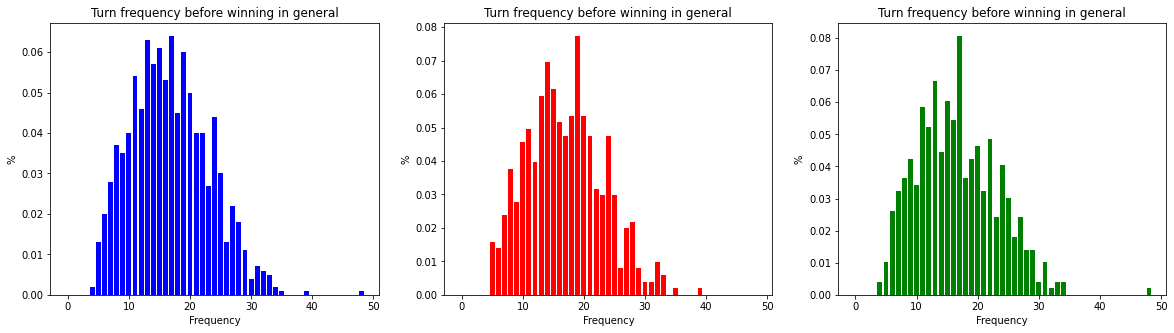

In [3]:
# Simuler le graph pour représenter la partition des 3 fréquences
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 5))

plt.grid()
# Graph 1
ax1.bar(df["value"], df["rates_move"], color="blue")
ax1.set_title("Turn frequency before winning in general")
ax1.set_xlabel("Frequency")
ax1.set_ylabel("%")


# Graph 2
ax2.bar(df["value"], df["rates_move_player1"], color="red")
ax2.set_title("Turn frequency before winning in general")
ax2.set_xlabel("Frequency")
ax2.set_ylabel("%")

# Graph 3
plt.grid()
ax3.bar(df["value"], df["rates_move_player2"], color="green")
ax3.set_title("Turn frequency before winning in general")
ax3.set_xlabel("Frequency")
ax3.set_ylabel("%")

# Sauvegarder le graph sous forme PNG
#plt.savefig("binomial_dist_nb_coups.jpg")

Dans ce cas-là, le nombre de coups qui possède la fréquence d'apparition la plus grande est 13.

En classifiant les fréquences selon la victoire de chaque joueur, on obtient le graphe ci-dessous, dont :
- la ligne bleue représente la fréquence des nombres de coups en général
- celle en rouge pour la fréquence des nombres de coups par le premier joueur
- et celle en verte pour l'autre

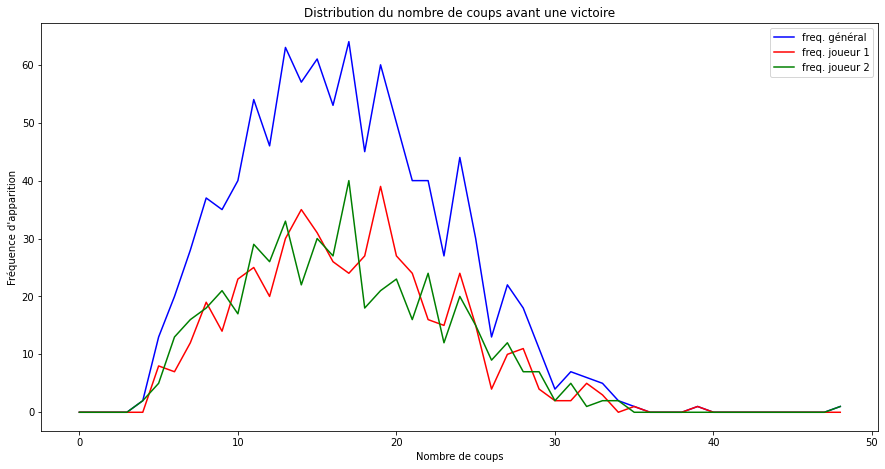

In [4]:
# Plot a line graph 
plt.figure(figsize=(15, 7.5))
plt.grid()
ax1 = plt.plot(df["value"],df["freq_move"],color="blue",label="freq. général")
ax2 = plt.plot(df["value"],df["freq_1"],color="red",label="freq. joueur 1")
ax3 = plt.plot(df["value"],df["freq_2"],color="green",label="freq. joueur 2")

plt.legend()

plt.xlabel("Nombre de coups")
plt.ylabel("Fréquence d'apparition")
plt.title("Distribution du nombre de coups avant une victoire")
plt.grid()

# Sauvegarder le graph sous forme PNG
#plt.savefig("binomial_dist_nb_coups_classified.jpg")

En observant le graphe, on trouve que le nombre de coups qui possède la fréquence d'apparition la plus grande est 16 pour le premier joueur, et 13 pour l'autre. 

---

# PHASE ETC

In [5]:
# Import necessary libraries
from monte_carlo import *
from bandits_manchots import *
from graphic import *


import matplotlib as mpl
import seaborn as sns
sns.set(context="notebook", style="whitegrid", palette="hls", font="sans-serif", font_scale=1.4) 
from tqdm import tqdm_notebook as tqdm

In [6]:
mpl.rcParams['figure.figsize'] = (20, 10)

## Algorithme Baseline

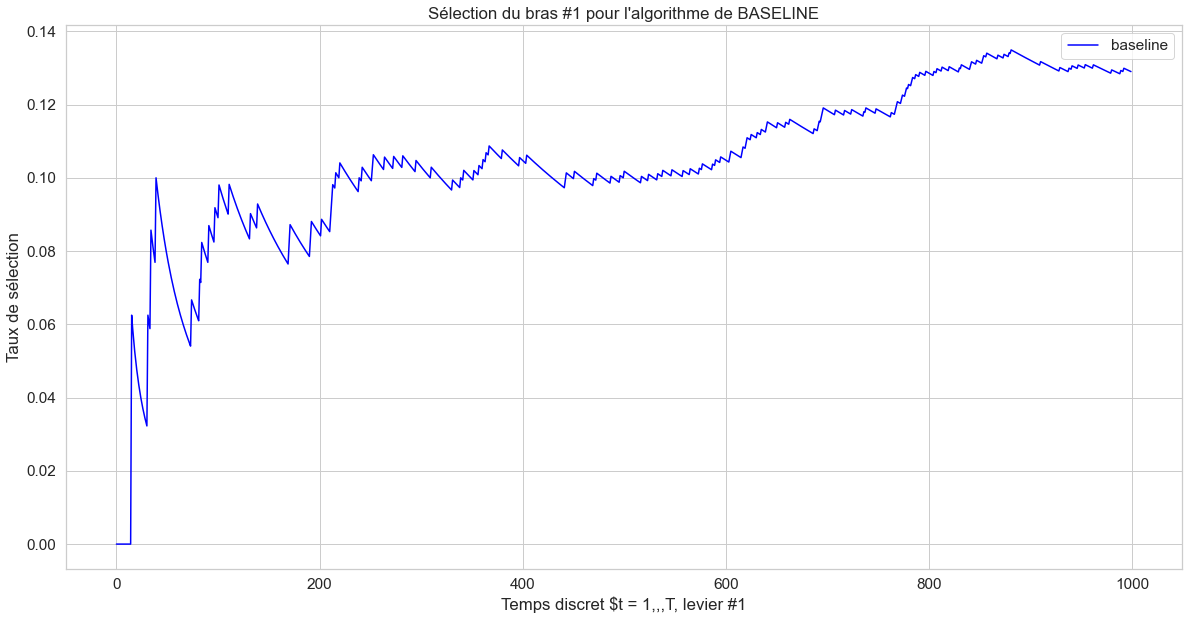

In [10]:
# ================================================
# SELECTION RATE OF BASELINE ALGORITHMS
# ================================================
plt.plot(
  Graphic.selections_simulation(P,1,"baseline",1000,1),
  label="baseline",
  color="blue")

plt.xlabel("Temps discret $t = 1,,,T, levier #1")
plt.ylabel("Taux de sélection")
plt.title("Sélection du bras #1 pour l'algorithme de BASELINE")

plt.legend()

## Comparaison de Greedy et $\epsilon$-Greedy

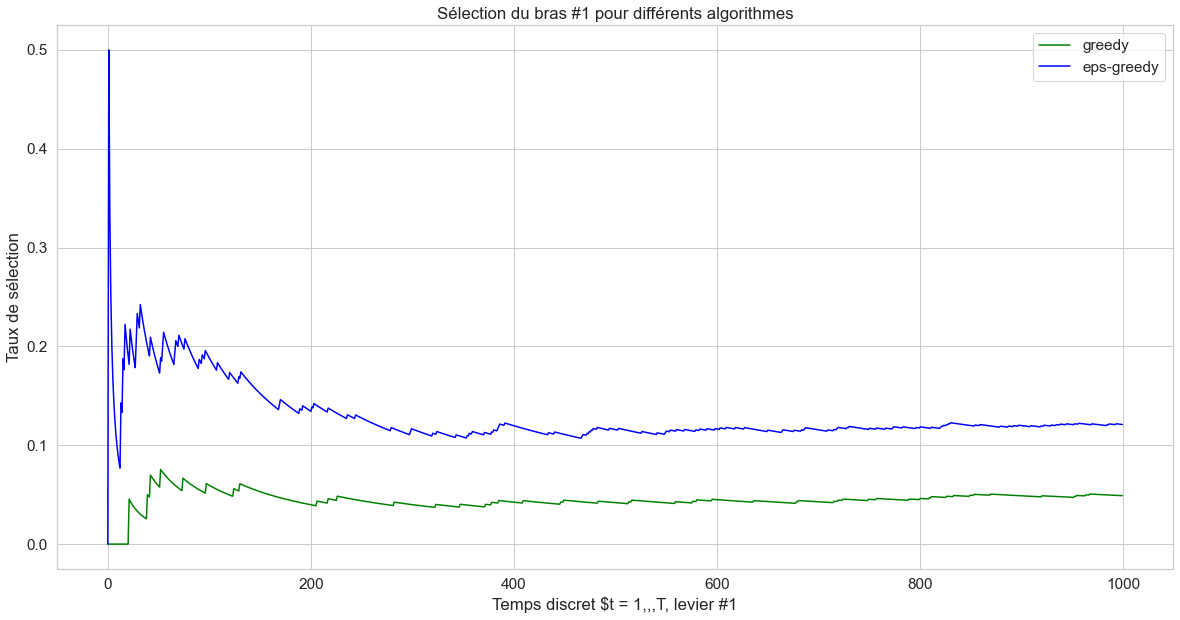

In [8]:
# ================================================
# SELECTION RATE OF THE GREEDY AND E-GREEDY ALGORITHMS
# ================================================
plt.plot(
  Graphic.selections_simulation(P,1,"greedy",1000,1),
  label="greedy",
  color="green")

plt.plot(
  Graphic.selections_simulation(P,1,"eps-greedy",1000,1),
  label="eps-greedy",
  color="blue")

plt.xlabel("Temps discret $t = 1,,,T, levier #1")
plt.ylabel("Taux de sélection")
plt.title("Sélection du bras #1 pour différents algorithmes")

plt.legend()

## Algorithme UCB

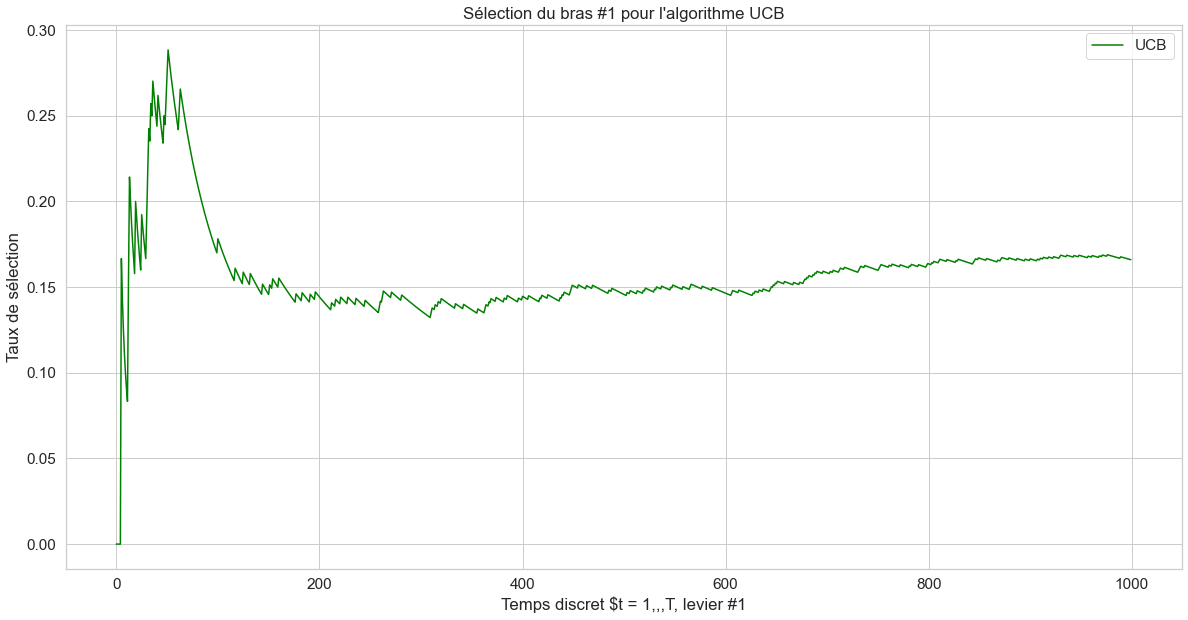

In [11]:
# ================================================
# SELECTION RATE OF THE UCB ALGORITHMS
# ================================================
plt.plot(
  Graphic.selections_simulation(P,1,"UCB",1000,1),
  label="UCB",
  color="green")

plt.xlabel("Temps discret $t = 1,,,T, levier #1")
plt.ylabel("Taux de sélection")
plt.title("Sélection du bras #1 pour l'algorithme UCB")

plt.legend()

---